<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

data = pd.read_csv("/datasets/real_estate_data.csv", delimiter='\t')

pd.DataFrame(data).head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
print(data.isna().sum())
print('---------------------------------------------------------------')
print(data.isnull().mean())

#Можно ли объединить как-то результаты этих двух выводов в одну таблицу?

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
---------------------------------------------------------------
total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299

In [4]:
for col in data:
    print(col)
    print(data[col].unique())
    print('---------------------------------------------------------------')
    print()

total_images
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
---------------------------------------------------------------

last_price
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
---------------------------------------------------------------

total_area
[108.    40.4   56.   ...  66.86 133.81  76.75]
---------------------------------------------------------------

first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
---------------------------------------------------------------

rooms
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
---------------------------------------------------------------

ceiling_height
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3

**Вывод 1**

*Файл с данными открыт. Выведена информация по данным,статистические данные и уникальные значения по каждому столбцу*

*На основании данных о пропусках по каждому столбцу:*
- ceiling_height — высота потолков (м) - изменить пустые значения на медианное значение, изменить высоту потолков более 10 м на медианное значение
- living_area — жилая площадь в квадратных метрах(м²) - изменить пустые значения на медианное значение в зависимости от количества комнат
- floors_total — всего этажей в доме - убрать строчки с пустыми значениями (таких всего 0,3%), убрать строчки, где этажей более 40
- is_apartment — апартаменты (булев тип) - изменить пустые значения на True
- kitchen_area — площадь кухни в квадратных метрах (м²) - изменить пустые значения на медианное значение в зависимости от количества комнат
- balcony — число балконов - изменить пустые значения на 0
- locality_name — название населённого пункта - замена Nan на ""
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - замена Nan на ""
- cityCenters_nearest — расстояние до центра города (м) - изменить пустые значения на медианное значение
- parks_around3000 —число парков в радиусе 3 км-изменить пустые значения на среднее значение,округленное в большую сторону (среднее значение 0.611408, поэтому 1)
- parks_nearest — расстояние до ближайшего парка (м) - изменить пустые значения на медианное значение
- ponds_around3000 — число водоёмов в радиусе 3 км-изменить пустые значения на среднее значение,округленное в большую сторону (среднее значение 0.770255, поэтому 1)
- ponds_nearest — расстояние до ближайшего водоёма (м)- изменить пустые значения на медианное значение
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) - изменить пустые значения на медианное значение
- rooms - если количество комнат равно 0 (таких всего 0,8%), изменить на 1

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Молодец, хороший тон использовать методы info() и describe() для получения общей информации из таблицы.
    
 
</div>

## Предобработка данных

In [5]:
print("Медианное значение по высоте полотков:", data['ceiling_height'].median())
print('---------------------------------------------------------------')
print(data.groupby('rooms')['living_area'].median())
print('---------------------------------------------------------------')
print(data.groupby('rooms')['kitchen_area'].median())
print('---------------------------------------------------------------')
print(data['rooms'].value_counts(normalize = True))
print('---------------------------------------------------------------')
Counter(data['locality_name'])

Медианное значение по высоте полотков: 2.65
---------------------------------------------------------------
rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64
---------------------------------------------------------------
rooms
0        NaN
1       9.04
2       8.80
3       9.50
4      11.10
5      15.10
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64
---------------------------------------------------------------
1     0.339550
2     0.335035
3     0.245327
4     0.049791
5     0.013756
0     0.008313
6     0.004431
7     0.002490
8     0.000506
9     0.000338
10    0.000127
14    0.000084
11    0.000084
19    0.000042
12    0.000042

Counter({'Санкт-Петербург': 15721,
         'посёлок Шушары': 440,
         'городской посёлок Янино-1': 61,
         'посёлок Парголово': 327,
         'посёлок Мурино': 522,
         'Ломоносов': 133,
         'Сертолово': 142,
         'Петергоф': 201,
         'Пушкин': 369,
         'деревня Кудрово': 299,
         'Коммунар': 89,
         'Колпино': 338,
         'поселок городского типа Красный Бор': 5,
         'Гатчина': 307,
         'поселок Мурино': 34,
         'деревня Фёдоровское': 8,
         'Выборг': 237,
         'Кронштадт': 96,
         'Кировск': 84,
         'деревня Новое Девяткино': 144,
         'посёлок Металлострой': 66,
         'посёлок городского типа Лебяжье': 11,
         'посёлок городского типа Сиверский': 29,
         'поселок Молодцово': 9,
         'поселок городского типа Кузьмоловский': 13,
         'садовое товарищество Новая Ропша': 1,
         'Павловск': 38,
         'деревня Пикколово': 1,
         'Всеволожск': 398,
         'Волхов': 111,


In [6]:
height10 = data.query('ceiling_height >10')
height1 = data.query('ceiling_height < 2')

print(height10['ceiling_height'].describe())
print(Counter(height10['ceiling_height']))
print()
print(height1['ceiling_height'].describe())
print(Counter(height1['ceiling_height']))

count     25.000000
mean      27.976000
std       15.691937
min       10.300000
25%       25.000000
50%       26.000000
75%       27.000000
max      100.000000
Name: ceiling_height, dtype: float64
Counter({27.0: 8, 25.0: 7, 32.0: 2, 24.0: 1, 26.0: 1, 14.0: 1, 20.0: 1, 22.6: 1, 27.5: 1, 10.3: 1, 100.0: 1})

count    3.000000
mean     1.316667
std      0.388373
min      1.000000
25%      1.100000
50%      1.200000
75%      1.475000
max      1.750000
Name: ceiling_height, dtype: float64
Counter({1.2: 1, 1.75: 1, 1.0: 1})


In [7]:
data['is_apartment'] = data['is_apartment'].astype('bool', errors='ignore')


data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


data['living_area'] = data['living_area'].fillna(data.groupby(data['rooms'])['living_area'].transform('median'))

data['floors_total']  = data['floors_total'].fillna('')
data = data.drop(np.where(data['floors_total'] == '')[0])
data['floors_total']  = data['floors_total'].astype('int')
data = data.query('floors_total < 40')


data['is_apartment']  = data['is_apartment'].fillna(True)

data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(data['rooms'])['kitchen_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area']  = data['kitchen_area'].astype('float')
#так как нет данных по площади кухни, когда количество комнат 0, то ставим 0

data['locality_name']  = data['locality_name'].fillna('')


data['balcony']  = data['balcony'].fillna(0)
data['balcony']  = data['balcony'].astype('int')

data['airports_nearest'] = data['airports_nearest'].fillna("")
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

data['parks_around3000'] = data['parks_around3000'].fillna(1)

#расстояние до ближайшего парка: сначала меняем пустые значения на медиану, а потом если вблизи нет парков, то туда ставим ""
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = ""

data.loc[data['rooms'] == 0, 'rooms'] = 1

data['ponds_around3000'] = data['ponds_around3000'].fillna(1)

#расстояние до ближайшего пруда: сначала меняем пустые значения на медиану, а потом если вблизи нет парков, то туда ставим ""
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = ""

data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

#исправление наименований
data.loc[data['locality_name'] == 'деревня Кудрово', 'locality_name'] = 'Кудрово'
data.loc[data['locality_name'] == 'посёлок Мурино', 'locality_name'] = 'Мурино'
data.loc[data['locality_name'] == 'поселок Мурино', 'locality_name'] = 'Мурино'



pd.DataFrame(data).head(15)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,...,25.00,0,Санкт-Петербург,18863,16028.0,1.0,482,2.0,755,95.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,True,...,11.00,2,посёлок Шушары,12817,18603.0,0.0,,0.0,,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,True,...,8.30,0,Санкт-Петербург,21741,13933.0,1.0,90,2.0,574,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,45.00,9,True,...,9.50,0,Санкт-Петербург,28098,6800.0,2.0,84,3.0,234,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,...,41.00,0,Санкт-Петербург,31856,8098.0,2.0,112,1.0,48,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,,13093.0,1.0,455,1.0,503,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,True,...,14.40,1,посёлок Парголово,52996,19143.0,0.0,,0.0,,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,30.50,22,True,...,18.90,2,Санкт-Петербург,23982,11634.0,0.0,,0.0,,95.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,True,...,8.81,0,Мурино,,13093.0,1.0,455,1.0,503,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,...,6.50,2,Санкт-Петербург,50898,15008.0,0.0,,0.0,,289.0


<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
1. Апартаменты, балокны. Если не указано колическтво балконов, то скорее всего их в квартире нет. Аналогичная ситуация и с апартаментами.
    
2. Потолки. Да, пропуски в высоте потолков можно заменить медианным значением, оно соответствует стандартам ГОСТа.
    
3. Жилая площадь, площадь кухни. Самая лучшая замена пропусков --- замена с помощь группировки. Действительно,  и та, и другая площадь косвенно зависят от количества комнат в квартире.
    
4. Как думаешь, о конат это ошибка в данных?
    
5. Расстояние до парков, прудов, аэропорта. Данные столбцы заполняются автоматически, исходя из геолокации, так что пропуски можно оставить как есть.
    
6. Населенный пункт. Да, ты верно заметила, что присутсвуют различные названия одних и тех же населенных пунктов. Тут лучше в принципе заменить во всех словах ё на е.
 
</div>

In [8]:
data.info()
print('---------------------------------------------------------------')
print(data.isnull().mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23611 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23611 non-null int64
last_price              23611 non-null float64
total_area              23611 non-null float64
first_day_exposition    23611 non-null object
rooms                   23611 non-null int64
ceiling_height          23611 non-null float64
floors_total            23611 non-null int64
living_area             23611 non-null float64
floor                   23611 non-null int64
is_apartment            23611 non-null bool
studio                  23611 non-null bool
open_plan               23611 non-null bool
kitchen_area            23611 non-null float64
balcony                 23611 non-null int64
locality_name           23611 non-null object
airports_nearest        23611 non-null object
cityCenters_nearest     23611 non-null float64
parks_around3000        23611 non-null float64
parks_nearest           23611 non-null object
ponds_around3000     

In [9]:
print("Количество дубликатов ", data.duplicated(keep = False).sum())

Количество дубликатов  0


**Вывод 2**

*Данные изменены в 'is_apartment' на тип boolean, так как там значения False True. Данные изменены в 'balcony' на тип int, так как значения - целые числа. Данные изменены в 'kitchen_area' на тип float для дальнейших вычислений*

*Были заменены все пропуски в данных в соответствии с предыдущим выводом 1. Теперь заполнены все 23611 строк. Дубликаты отсутствуют.*

## Расчёты и добавление результатов в таблицу

In [10]:
data['tsena_metra'] = data['last_price'] / data['total_area']
data = data[ ['tsena_metra'] + [ col for col in data.columns if col != 'tsena_metra' ] ]

In [11]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data = data[ ['year'] + [ col for col in data.columns if col != 'year' ] ]

data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data = data[ ['month'] + [ col for col in data.columns if col != 'month' ] ]

data['day'] = pd.DatetimeIndex(data['first_day_exposition']).day
data = data[ ['day'] + [ col for col in data.columns if col != 'day' ] ]

data['day_of_week']= pd.to_datetime(data['first_day_exposition']).dt.dayofweek
data = data[ ['day_of_week'] + [ col for col in data.columns if col != 'day_of_week' ] ]

In [12]:
def etaj(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return "первый"
    if floor == floors_total:
        return "последний"
    else:
        return "другой"
data['floor_group'] = data.apply(etaj, axis = 1)
data = data[ ['floor_group'] + [ col for col in data.columns if col != 'floor_group' ] ]

pd.DataFrame(data['floor_group'].value_counts())

,floor_group
другой,17361
последний,3336
первый,2914


In [13]:
data['living_area/total_area'] = data['living_area'] / data['total_area']
data = data[ ['living_area/total_area'] + [ col for col in data.columns if col != 'living_area/total_area'] ]

data['kitchen_area/total_area'] = data['kitchen_area'] / data['total_area']
data = data[ ['kitchen_area/total_area'] + [ col for col in data.columns if col != 'kitchen_area/total_area'] ]

data = data[ ['tsena_metra'] + [ col for col in data.columns if col != 'tsena_metra' ] ]

pd.DataFrame(data).head(15)

,tsena_metra,kitchen_area/total_area,living_area/total_area,floor_group,day_of_week,day,month,year,total_images,last_price,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,120370.370370,0.231481,0.472222,другой,3,7,3,2019,20,13000000.0,...,25.00,0,Санкт-Петербург,18863,16028.0,1.0,482,2.0,755,95.0
1,82920.792079,0.272277,0.460396,первый,1,4,12,2018,7,3350000.0,...,11.00,2,посёлок Шушары,12817,18603.0,0.0,,0.0,,81.0
2,92785.714286,0.148214,0.612500,другой,3,20,8,2015,10,5196000.0,...,8.30,0,Санкт-Петербург,21741,13933.0,1.0,90,2.0,574,558.0
3,408176.100629,0.059748,0.283019,другой,4,24,7,2015,0,64900000.0,...,9.50,0,Санкт-Петербург,28098,6800.0,2.0,84,3.0,234,424.0
4,100000.000000,0.410000,0.320000,другой,1,19,6,2018,2,10000000.0,...,41.00,0,Санкт-Петербург,31856,8098.0,2.0,112,1.0,48,121.0
5,95065.789474,0.299342,0.473684,другой,0,10,9,2018,10,2890000.0,...,9.10,0,городской посёлок Янино-1,,13093.0,1.0,455,1.0,503,55.0
6,99195.710456,0.386059,0.284182,другой,3,2,11,2017,6,3700000.0,...,14.40,1,посёлок Парголово,52996,19143.0,0.0,,0.0,,155.0
7,110544.692737,0.263966,0.425978,другой,3,18,4,2019,5,7915000.0,...,18.90,2,Санкт-Петербург,23982,11634.0,0.0,,0.0,,95.0
8,87454.764777,0.265682,0.465320,другой,2,23,5,2018,20,2900000.0,...,8.81,0,Мурино,,13093.0,1.0,455,1.0,503,189.0
9,88524.590164,0.106557,0.714754,другой,6,26,2,2017,18,5400000.0,...,6.50,2,Санкт-Петербург,50898,15008.0,0.0,,0.0,,289.0


**Вывод 3**

*Были добавлены следующие столбики:*
- цена метра
- отношений площади кухни к общей площади
- отношение жилой площади к общей площади
- группа по этажу
- день недели, день, месяц, год публикации

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Очень хорошо, что ты пишешь свои функции и используешь стандартные методы модуля datetime. Так твой код становится гораздо структурированнее.
    
 
</div>

## Исследовательский анализ данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23611 entries, 0 to 23698
Data columns (total 30 columns):
tsena_metra                23611 non-null float64
kitchen_area/total_area    23611 non-null float64
living_area/total_area     23611 non-null float64
floor_group                23611 non-null object
day_of_week                23611 non-null int64
day                        23611 non-null int64
month                      23611 non-null int64
year                       23611 non-null int64
total_images               23611 non-null int64
last_price                 23611 non-null float64
total_area                 23611 non-null float64
first_day_exposition       23611 non-null object
rooms                      23611 non-null int64
ceiling_height             23611 non-null float64
floors_total               23611 non-null int64
living_area                23611 non-null float64
floor                      23611 non-null int64
is_apartment               23611 non-null bool
studio      

**4.1 Изучение параметров**

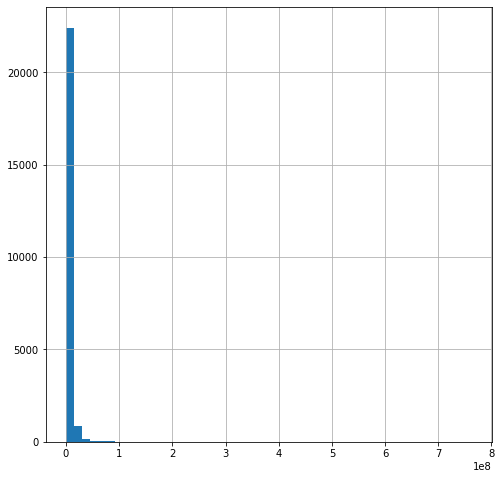

In [15]:
data['last_price'].hist(bins = 50, figsize = (8,8))

<div class="alert alert-warning">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Для бОльшей наглядности советую тебе подписывать названия графиков и оси)
    
 
</div>

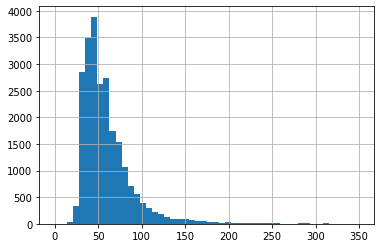

In [16]:
data['total_area'].hist(bins = 50, range = (0,350) )

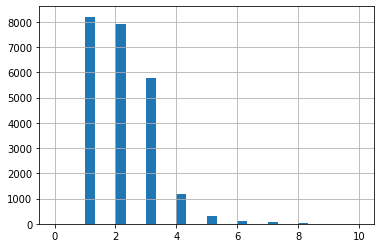

In [17]:
data['rooms'].hist(bins = 30, range = (0,10))

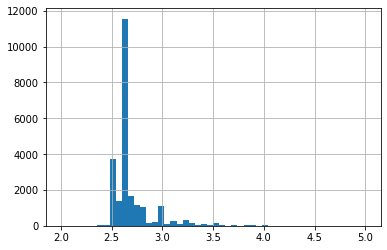

In [18]:
data['ceiling_height'].hist(bins = 50, range = (2,5))

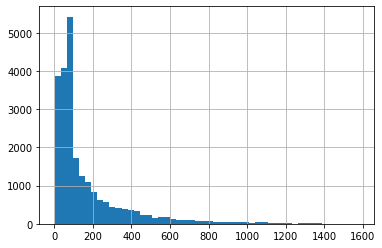

In [19]:
data['days_exposition'].hist(bins = 50)

In [20]:
print("Среднее по количеству дней публикации", data['days_exposition'].mean())
print()
print("Медиана по количеству дней публикации",data['days_exposition'].median())

Среднее по количеству дней публикации 169.3530981322265

Медиана по количеству дней публикации 95.0


<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
В среднем продажа увартиры занимает 2-3 месяца. А что отнести к долгой продаже?
 
</div>

**Вывод 4.1**
- *По площади: больше всего объявлений по площади от 35 до 75 м2*
- *Больше всего однокомнатных и двухкомнатных квартир*

**4.2 Редкие и выбивающиеся значения**

1. Высота потолков меньше 2 метров/ больше 10 метров -> Необходимо заменить данные значения на медианные
2. Высокая цена/низкая цена
3. Большое количество этажей в доме
4. Количество комнат равное 0

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Квартиры с большой площадью и ценой лучше не учитывать. Такая недвижимость относится к элитному классу и заслуживает отдельного исследования.
 
</div>

In [21]:
def colour(data):
    print('\033[2;35m {} \033[0;0m'.format((data.mean())))

In [22]:
#высота потолков
print('Медиана по высоте потолков до:',end = '')
colour(data['ceiling_height'])

print('---------------------------------------------------------------')
height10 = data.query('ceiling_height >10 or ceiling_height < 2')
height1 = data.query('ceiling_height < 2')

print(height10['ceiling_height'].describe())
print(Counter(height10['ceiling_height']))
print()
print(height1['ceiling_height'].describe())
print(Counter(height1['ceiling_height']))

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = data['ceiling_height'].median()
print()
print(data['ceiling_height'].sort_values())
print()
print('---------------------------------------------------------------')
print('Медиана по высоте потолков после:',end = '')
colour(data['ceiling_height'])

Медиана по высоте потолков до: 2.7245771038922535 
---------------------------------------------------------------
count     28.000000
mean      25.119643
std       17.011654
min        1.000000
25%       23.650000
50%       25.000000
75%       27.000000
max      100.000000
Name: ceiling_height, dtype: float64
Counter({27.0: 8, 25.0: 7, 32.0: 2, 24.0: 1, 26.0: 1, 1.2: 1, 14.0: 1, 1.75: 1, 20.0: 1, 22.6: 1, 27.5: 1, 10.3: 1, 1.0: 1, 100.0: 1})

count    3.000000
mean     1.316667
std      0.388373
min      1.000000
25%      1.100000
50%      1.200000
75%      1.475000
max      1.750000
Name: ceiling_height, dtype: float64
Counter({1.2: 1, 1.75: 1, 1.0: 1})

2572     2.0
16884    2.0
4212     2.0
11352    2.0
552      2.0
        ... 
20264    6.0
15743    8.0
17442    8.0
3474     8.0
5863     8.3
Name: ceiling_height, Length: 23611, dtype: float64

---------------------------------------------------------------
Медиана по высоте потолков после: 2.6979306255558844 


In [23]:
#высокая/низкая цена
print('Медиана по цене до', end ='')
colour(data['last_price'])

print(data['last_price'].sort_values())

data = data.query('last_price not in (12190,763000000) ')

print('Медиана по цене после', end ='')
colour(data['last_price'])

Медиана по цене до 6540780.064292068 
8793         12190.0
14911       430000.0
17456       430000.0
16274       440000.0
16219       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23611, dtype: float64
Медиана по цене после 6509015.4563090345 


In [24]:
#количество этажей, большее чем 40,были убраны ранее
Counter(data['floors_total'])

Counter({16: 1376,
         11: 203,
         5: 5788,
         14: 553,
         12: 1362,
         26: 124,
         24: 469,
         27: 164,
         9: 3761,
         6: 914,
         17: 833,
         25: 1074,
         3: 668,
         23: 352,
         19: 339,
         18: 505,
         4: 1200,
         22: 286,
         8: 390,
         2: 383,
         10: 1173,
         7: 592,
         13: 229,
         15: 365,
         20: 271,
         28: 21,
         36: 3,
         21: 158,
         35: 24,
         34: 1,
         1: 25,
         29: 1,
         33: 1,
         37: 1})

In [25]:
#количество комнат, равное 0, были ранее изменены на 1
Counter(data['rooms'])

Counter({3: 5795,
         1: 8208,
         2: 7911,
         4: 1177,
         5: 325,
         6: 104,
         7: 58,
         11: 2,
         8: 12,
         14: 2,
         10: 3,
         15: 1,
         9: 8,
         19: 1,
         16: 1,
         12: 1})

**Вывод 4.2**

*Были убраны выбивающиеся значения по высоте потолков, цене. До этого уже было убрано большое количество этажей в доме и изменено нулевое количество комнат на 1.*

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Отлично, данные готовы к изучению)
 
</div>

**4.3 Изучение факторов,которые влияют на стоимость квартиры**

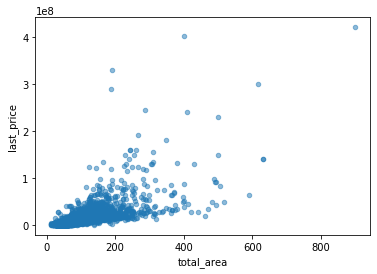

In [26]:
#площадь и цена
data.plot(x='total_area', y='last_price', kind = 'scatter',alpha = 0.5) 

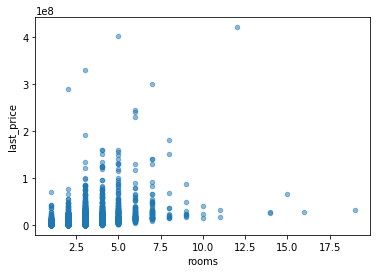

In [27]:
#число комнат и цена
data.plot(x='rooms', y='last_price', kind = 'scatter', alpha = 0.5) 

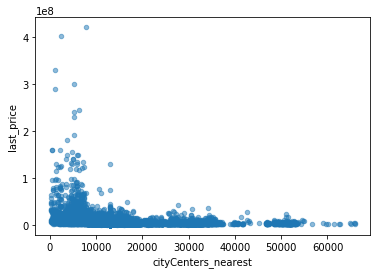

In [28]:
#удаленность от центра и цена
data.plot(x='cityCenters_nearest', y='last_price',  kind = 'scatter',  alpha = 0.5)

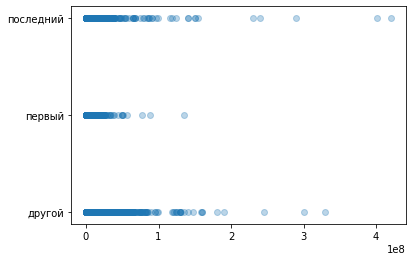

In [29]:
#этаж и цена
plt.scatter(data['last_price'].values, data['floor_group'], alpha = 0.3)

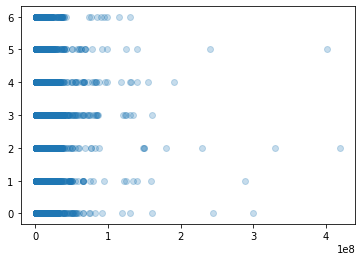

In [30]:
#день недели и цена
plt.scatter(data['last_price'].values, data['day_of_week'], alpha = 0.25)

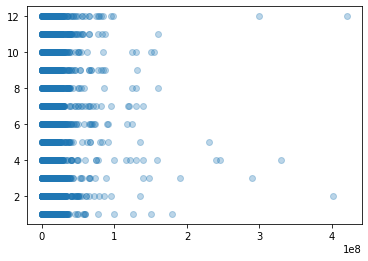

In [31]:
#месяц и цена
plt.scatter(data['last_price'].values, data['month'], alpha = 0.3)

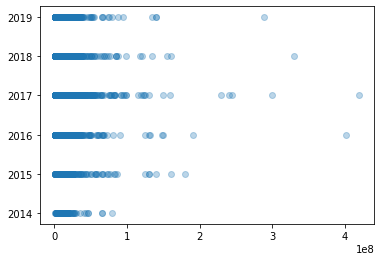

In [32]:
#год и цена
plt.scatter(data['last_price'].values, data['year'], alpha = 0.3)

In [33]:
print(data['total_area'].corr(data['last_price']))
print(data['rooms'].corr(data['last_price']))
print(data['cityCenters_nearest'].corr(data['last_price']))

0.7025644550643984
0.3940365432300009
-0.20924829473644327


**Вывод 4.3**

*Были изучены факторы, которые влияют на стоимость квартиры*
* *Чем больше площадь квартиры, тем выше цена*
* *Чем больше комнат, тем выше цена*
* *Цена на жилье на первом этаже ниже*
* *Цена не сильно отличается по месяцу и дню недели*

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Конечно, в первую очередь стоимость зависит от площади. А вот количество комнат играет явно не решающую роль в образовании цены.
    
 Квартиры на первом этаже дешевле, чем на остальных. Причем вне зависимости от месторасположения.
    
 Ни день недели, ни месяц не влияют на стоимость. Цена изменяется в пределах погрешности.
</div>

**4.4 Изучение населенных пунктов**

In [34]:
data2 = data['locality_name'].value_counts().sort_values(ascending = False).head(10)
print(data2.index)
print(data2)

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'Выборг'],
      dtype='object')
Санкт-Петербург      15648
Мурино                 586
Кудрово                470
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64


In [35]:
data.groupby('locality_name')['tsena_metra'].mean().sort_values(ascending = False).head(15)
data_local = data.query('locality_name in @data2.index')
data_local = data_local.pivot_table(
    index = 'locality_name', values = 'tsena_metra', aggfunc='median'
)

print(data_local.sort_values('tsena_metra', ascending = False))

                     tsena_metra
locality_name                   
Санкт-Петербург    104782.477485
Пушкин             100000.000000
Кудрово             95555.311677
посёлок Парголово   91642.857143
Мурино              86250.377687
посёлок Шушары      76829.268293
Колпино             74723.748474
Гатчина             67796.610169
Всеволожск          65789.473684
Выборг              58158.319871


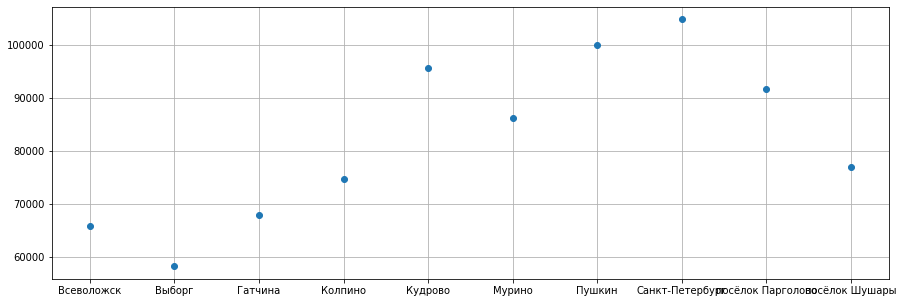

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(data_local, 'o')
plt.grid(True)
plt.show()

**Вывод 4.4**


*Было выделено 10 населенных пунктов с большим количеством объявлений:
'Санкт-Петербург', 'Мурино', 'Кудрово', 'посёлок Шушары', 'Всеволожск','Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'Выборг'. По цене за квадратный метр самое дорогое жилье в Санкт-Петербурге, самое дешевое в Выборге.*

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, Выборг замыкает эту 10-ку)
</div>

**4.5 Изучение центра СПб**

In [37]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
print(data_spb.shape)

data_spb['centre_spb'] = (data_spb['cityCenters_nearest'] / 1000).round(0)
data_spb = data_spb[['centre_spb'] + [ col for col in data.columns if col != 'centre_spb' ] ]

pd.DataFrame(data_spb).head()

(15648, 30)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,centre_spb,tsena_metra,kitchen_area/total_area,living_area/total_area,floor_group,day_of_week,day,month,year,total_images,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,16.0,120370.370370,0.231481,0.472222,другой,3,7,3,2019,20,...,25.0,0,Санкт-Петербург,18863,16028.0,1.0,482,2.0,755,95.0
2,14.0,92785.714286,0.148214,0.612500,другой,3,20,8,2015,10,...,8.3,0,Санкт-Петербург,21741,13933.0,1.0,90,2.0,574,558.0
3,7.0,408176.100629,0.059748,0.283019,другой,4,24,7,2015,0,...,9.5,0,Санкт-Петербург,28098,6800.0,2.0,84,3.0,234,424.0
4,8.0,100000.000000,0.410000,0.320000,другой,1,19,6,2018,2,...,41.0,0,Санкт-Петербург,31856,8098.0,2.0,112,1.0,48,121.0
7,12.0,110544.692737,0.263966,0.425978,другой,3,18,4,2019,5,...,18.9,2,Санкт-Петербург,23982,11634.0,0.0,,0.0,,95.0


In [38]:
data_spb_group = data_spb.groupby('centre_spb')['tsena_metra'].median()
pd.DataFrame(data_spb_group)

,tsena_metra
centre_spb,
0.0,172619.047619
1.0,128485.110056
2.0,123035.513418
3.0,108469.112355
4.0,117848.970252
5.0,126932.465419
6.0,131835.227273
7.0,127017.083563
8.0,122781.988265


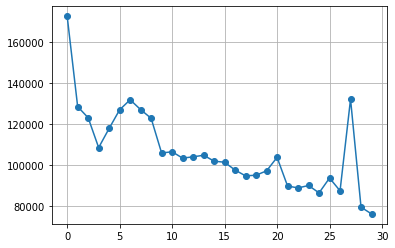

In [39]:
plt.plot(data_spb_group, 'o-')
plt.grid(True)
plt.show()

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Как думаешь, с чем связан выброс на 27 км?
 
</div>

In [40]:
central_data_spb = data_spb.query('centre_spb <= 9')
other_data_spb = data_spb.query('centre_spb > 9')

In [41]:
compare = pd.DataFrame({'Price': [data_spb['last_price'].mean().round(0), central_data_spb['last_price'].mean().round(0),  
                                  other_data_spb['last_price'].mean().round(0)],
                        'Tsena metra':[data_spb['tsena_metra'].mean().round(0), central_data_spb['tsena_metra'].mean().round(0),  
                                       other_data_spb['tsena_metra'].mean().round(0)],
                        'Rooms':[data_spb['rooms'].mean().round(2), central_data_spb['rooms'].mean().round(2),  
                                 other_data_spb['rooms'].mean().round(2)],
                        'Total area':[data_spb['total_area'].mean().round(2), central_data_spb['total_area'].mean().round(2),  
                                      other_data_spb['total_area'].mean().round(2)],
                        'Ceiling height':[data_spb['ceiling_height'].mean().round(2), central_data_spb['ceiling_height'].mean().round(2),  
                                          other_data_spb['ceiling_height'].mean().round(2)],
                       })

compare.index = ['СПБ', 'Центр', 'Периферия']

compare.style.highlight_max(color='yellowgreen', subset=['Price','Tsena metra','Rooms','Total area','Ceiling height'])

,Price,Tsena metra,Rooms,Total area,Ceiling height
СПБ,8.01743e+06,114763,2.18,64.72,2.72
Центр,1.31109e+07,138392,2.68,86.3,2.89
Периферия,5.83012e+06,104616,1.97,55.46,2.65


**Вывод 4.5**

* *Был выделен столбец с расстоянием от центра, построен график зависимости цены от расстояния от центра СПб.*
* *По графику видно, что чем дальше от центра, тем дешевле квартира. Однако, есть определенные места, где цена возрастает (20 км, 27 км). Это может быть связано с тем, что там находится элитное жилье, необычное место, парк или что-то другое.*
* *Примерно начиная с 9 км центр города заканчивается, цена жилья в этом месте снижается*
* *Было проведено сравнение средних значений в Спб в целом, в центре и вне центра по следующим параметрам: цена, цена квадратного метра, количество комнат, площадь, высота потолков*
* *В центре города все показатели выше, чем по городу в целом и на периферии*

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Ты верно заметилаЮ что центрельные квартиры выше в цене, в них больше количество комнат и высота потолков.
</div>

## Общий вывод

*1. было проведено изучение данных из файла, предобработка данных, расчеты и добавление результатов в таблицу и исследовательский анализ данных.*

*2. Были заменены все пропуски в данных. Заполнены все 23611 строк. Дубликаты отсутствуют. Были убраны редкие и выбивающиеся значения.*

*3. Были добавлены следующие столбики:цена метра, отношений площади кухни к общей площади, отношение жилой площади к общей площади, группа по этажу, день недели, день, месяц, год публикации.*

*4. По площади: больше всего объявлений по площади от 35 до 75 м2. Больше всего однокомнатных и двухкомнатных квартир.*

*5. Были изучены факторы, которые влияют на стоимость квартиры.*
*Чем больше площадь квартиры, тем выше цена.*
*Чем больше комнат, тем выше цена.*
*Цена на жилье на первом этаже ниже.*
*Цена не сильно отличается по месяцу и дню недели.*

*6. Было выделено 10 населенных пунктов с большим количеством объявлений:
'Санкт-Петербург', 'Мурино', 'Кудрово', 'посёлок Шушары', 'Всеволожск','Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'Выборг'. По цене за квадратный метр самое дорогое жилье в Санкт-Петербурге, самое дешевое в Выборге.*

*7. По графику видно, что чем дальше от центра, тем дешевле квартира. Однако, есть определенные места, где цена возрастает (20 км, 27 км). Это может быть связано с тем, что там находится элитное жилье, необычное место, парк или что-то другое.*
*Примерно начиная с 9 км центр города заканчивается, цена жилья в этом месте снижается.*
*Было проведено сравнение средних значений в Спб в целом, в центре и вне центра по следующим параметрам: цена, цена квадратного метра, количество комнат, площадь, высота потолков.*
*В центре города все показатели выше, чем по городу в целом и на периферии.*

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>

Поздравляю с успешным проектом!

- Ты хорошо анализируешь результаты.
    
- Код написан аккуратно и качественно, видно, что есть какой-то определенный бэкграунд.

- Соблюдена структура проекта, было приятно проверять:)
    
- Все написано четко и по делу

 


Желаю дальнейших успехов!


</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод